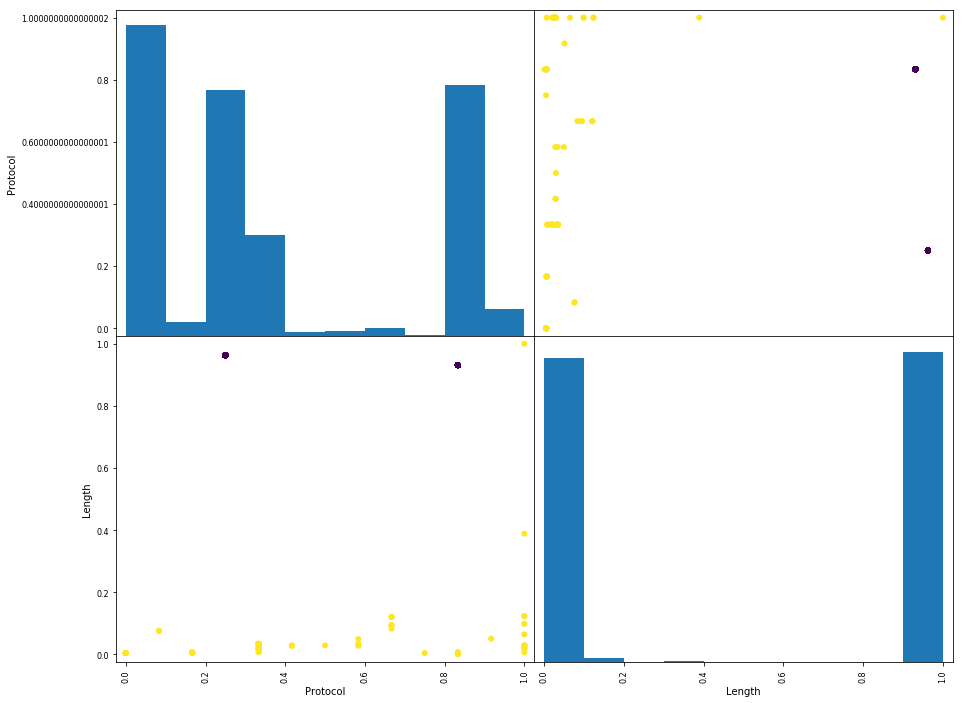

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import mglearn

##-------------load data method----------##
def load_dataframe(path):
    data_frame = pd.read_csv(path)
    return data_frame
##------------------------------##
df_duration = []
df_duration.append(0.0)
normalized_length = []
normalized_protocol = []
normalized_duration = []
target_list = []

df = load_dataframe("sample.csv")
df.drop(['No.','Time','Source','Destination', 'Info'], axis=1, inplace = True) ##drop unnecessary features
##------------- Handle patterned texts---------##
encoder = LabelEncoder()
df_protocol = df['Protocol']
df['Protocol'] = encoder.fit_transform(df_protocol)
##--------------------------------------------##

for i in range(0,499):
    target_list.append(0)
for i in range(0,499):
    target_list.append(1)
    
target = np.array(target_list)

##-----------------Count Duration & Normalize-----------##
# df_time = df["Time"]
# df_time_size = range(1,len(df_time))
# for i in df_time_size:
#     df_duration.append(abs((df_time.at[i] - df_time.at[i-1])))
# df["Time"] = pd.DataFrame(df_duration)
# df_time = df["Time"]
# duration_max = df_time.max()
# duration_min = df_time.min()
# denominator = duration_max - duration_min
# duration_loop = range(0,len(df_time))
# for j in duration_loop:
#     normalized_duration.append((df_time.at[j] - duration_min) / denominator)
# df["Time"] = pd.DataFrame(normalized_duration)        
##-----------------------------------------------------##

##-----------------Normalize Lenght--------------##
length = df['Length']
length_size = range(0,len(length))
length_max = length.max()
length_min = length.min()
denominator = length_max - length_min
for i in length_size:
    length.at[i] = length.at[i] + 0.0 
    normalized_length.append((length.at[i] - length_min) / (denominator))
df['Length'] = pd.DataFrame(normalized_length)
##-------------------------------##
##-----------------Normalize protocol--------------##
protocol = df['Protocol']
protocol_size = range(0,len(protocol))
protocol_max = protocol.max()
protocol_min = protocol.min()
denominator_p = protocol_max - protocol_min
for i in protocol_size:
    protocol.at[i] = protocol.at[i] + 0.0 
    normalized_protocol.append((protocol.at[i] - protocol_min) / (denominator_p))
df['Protocol'] = pd.DataFrame(normalized_protocol)    
##------------------------------------------------------##
# df.to_csv('normalized_with_duration.csv')
x_train, x_test, y_train, y_test = train_test_split(df.values, target, stratify=target, random_state=66)
data_frame = pd.DataFrame(x_train, columns = df.columns)
grr = pd.plotting.scatter_matrix(data_frame, c= y_train, marker ='o', figsize = (15,12), alpha = 2.6)
# plt.savefig("scatter_matrix_normalized.png")
